In [6]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from linearmodels.panel import PanelOLS
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("economic_story_regression.csv")

# Correlation Matrix AAP

In [8]:
#for_rf = df_accuracy_new.iloc[:25,:]
AAP_matrix = df[df['Instrument'] == 'AAPL.OQ'].drop("loss firm status", axis=1)
#.iloc[0:38, :]

# print the reversed DataFrame
AAP_matrix

,Instrument,Date,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5).1,Price Target - Standard Deviation,3 Month Total Return,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
9779,AAPL.OQ,2013-01-01,1.258461,Technology Hardware & Equipment,-0.081976,3.491566,4.079211,4.319396,1.76786,-0.289824,-1.647333,-1.004420,-0.795818,-0.380688,-0.747049,1.389797
9780,AAPL.OQ,2013-04-01,0.631804,Technology Hardware & Equipment,-0.131266,2.971833,3.161421,4.181912,1.84746,-0.324698,-1.421042,-0.944876,-0.817719,-0.367655,-0.338211,1.278991
9781,AAPL.OQ,2013-07-01,1.114814,Technology Hardware & Equipment,-0.153422,2.616975,2.464813,4.181912,1.87931,-0.334994,-0.963202,-0.904454,-0.835560,0.931854,-0.346387,1.112782
9782,AAPL.OQ,2013-10-01,1.573189,Technology Hardware & Equipment,-0.224695,3.158673,2.645611,4.044428,1.92983,-0.364104,1.202667,-1.183607,-0.835381,0.655696,-0.725244,0.946572
9783,AAPL.OQ,2014-01-01,1.406342,Technology Hardware & Equipment,-0.226502,3.692070,4.338504,4.044428,1.96491,-0.356349,1.008993,-1.194955,-0.834965,0.952897,-0.398173,0.798831
9784,AAPL.OQ,2014-04-01,2.707317,Technology Hardware & Equipment,-0.237089,3.487540,3.333301,4.181912,1.96296,-0.361124,-0.534994,-1.330884,-0.848909,0.779388,-0.242815,0.540283
9785,AAPL.OQ,2014-07-01,1.605028,Technology Hardware & Equipment,-0.175994,4.075238,2.642246,3.769460,2.01786,-0.322469,1.250323,-1.287160,-0.836175,0.514873,-0.231913,0.466412
9786,AAPL.OQ,2014-10-01,2.282586,Technology Hardware & Equipment,-0.165253,4.502835,3.036906,3.494493,1.90741,-0.358873,0.351919,-0.088890,-0.825221,0.485725,0.324107,0.263268
9787,AAPL.OQ,2015-01-01,2.923538,Technology Hardware & Equipment,-0.136696,5.035401,5.769158,3.494493,1.88462,-0.327881,0.427019,1.054065,-0.809434,-0.709603,0.792908,0.170929
9788,AAPL.OQ,2015-04-01,2.189976,Technology Hardware & Equipment,-0.143266,5.438298,4.373502,3.357009,1.88462,-0.309507,0.645711,-0.112119,-0.807348,-0.145090,0.689336,0.115526


In [9]:
corr_matrix1 = AAP_matrix.groupby('Instrument').corr()

/var/folders/48/zl9xdnts1pgch2fdmc_lcyl40000gn/T/ipykernel_44994/156192429.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_matrix = AAP_matrix.groupby('Instrument').corr()


<Axes: ylabel='Instrument-None'>

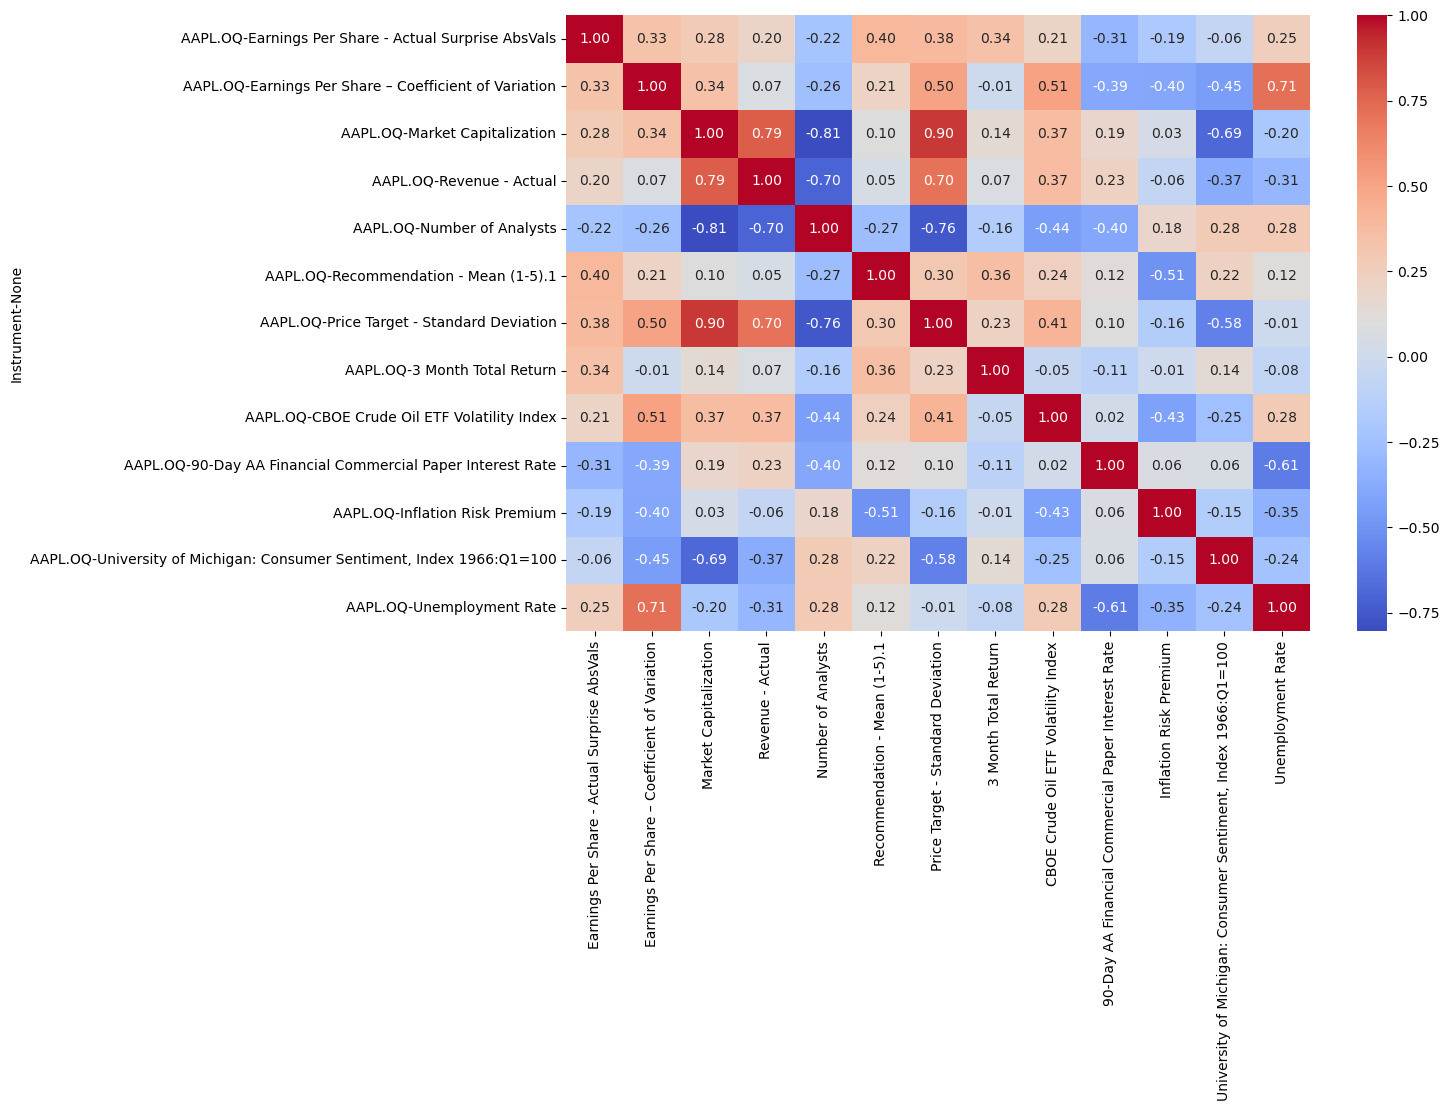

In [10]:
# plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True, fmt='.2f')

# Correlation Matrix GE.N

In [13]:
#for_rf = df_accuracy_new.iloc[:25,:]
GE_matrix = df[df['Instrument'] == 'GE.N'].drop("loss firm status", axis=1)
#.iloc[0:38, :]

# print the reversed DataFrame
GE_matrix

,Instrument,Date,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5).1,Price Target - Standard Deviation,3 Month Total Return,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
11177,GE.N,2013-01-01,1.145178,Capital Goods,-0.240033,1.375690,2.801675,-0.630021,2.00000,0.171223,-0.741639,-1.004420,-0.795818,-0.380688,-0.747049,1.389797
11178,GE.N,2013-04-01,0.635518,Capital Goods,-0.202134,1.536208,2.438480,-0.630021,2.00000,0.115386,0.497773,-0.944876,-0.817719,-0.367655,-0.338211,1.278991
11179,GE.N,2013-07-01,1.007228,Capital Goods,-0.246464,1.536303,2.447987,-0.630021,2.06250,0.074398,-0.193810,-0.904454,-0.835560,0.931854,-0.346387,1.112782
11180,GE.N,2013-10-01,1.072268,Capital Goods,-0.258306,1.551944,2.498634,-0.492538,2.11765,-0.024303,-0.005928,-1.183607,-0.835381,0.655696,-0.725244,0.946572
11181,GE.N,2014-01-01,0.530040,Capital Goods,-0.262364,1.893785,2.890434,-0.355054,2.16667,0.031108,1.001345,-1.194955,-0.834965,0.952897,-0.398173,0.798831
11182,GE.N,2014-04-01,1.563185,Capital Goods,-0.241564,1.698152,2.368482,-0.904989,2.27778,0.087849,-0.747648,-1.330884,-0.848909,0.779388,-0.242815,0.540283
11183,GE.N,2014-07-01,0.592774,Capital Goods,-0.241032,1.731386,2.541372,-0.904989,2.20000,0.012220,-0.106520,-1.287160,-0.836175,0.514873,-0.231913,0.466412
11184,GE.N,2014-10-01,1.123630,Capital Goods,-0.264325,1.679072,2.536409,-0.767505,2.23077,0.013213,-0.390002,-0.088890,-0.825221,0.485725,0.324107,0.263268
11185,GE.N,2015-01-01,1.300464,Capital Goods,-0.264682,1.650387,3.026895,-0.492538,2.06250,0.058903,-0.304337,1.054065,-0.809434,-0.709603,0.792908,0.170929
11186,GE.N,2015-04-01,1.466260,Capital Goods,-0.254445,1.619518,2.278125,-0.492538,2.11111,0.329489,-0.335952,-0.112119,-0.807348,-0.145090,0.689336,0.115526


In [15]:
corr_matrix2 = GE_matrix.groupby('Instrument').corr()

/var/folders/48/zl9xdnts1pgch2fdmc_lcyl40000gn/T/ipykernel_44994/3501357401.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_matrix2 = GE_matrix.groupby('Instrument').corr()


<Axes: ylabel='Instrument-None'>

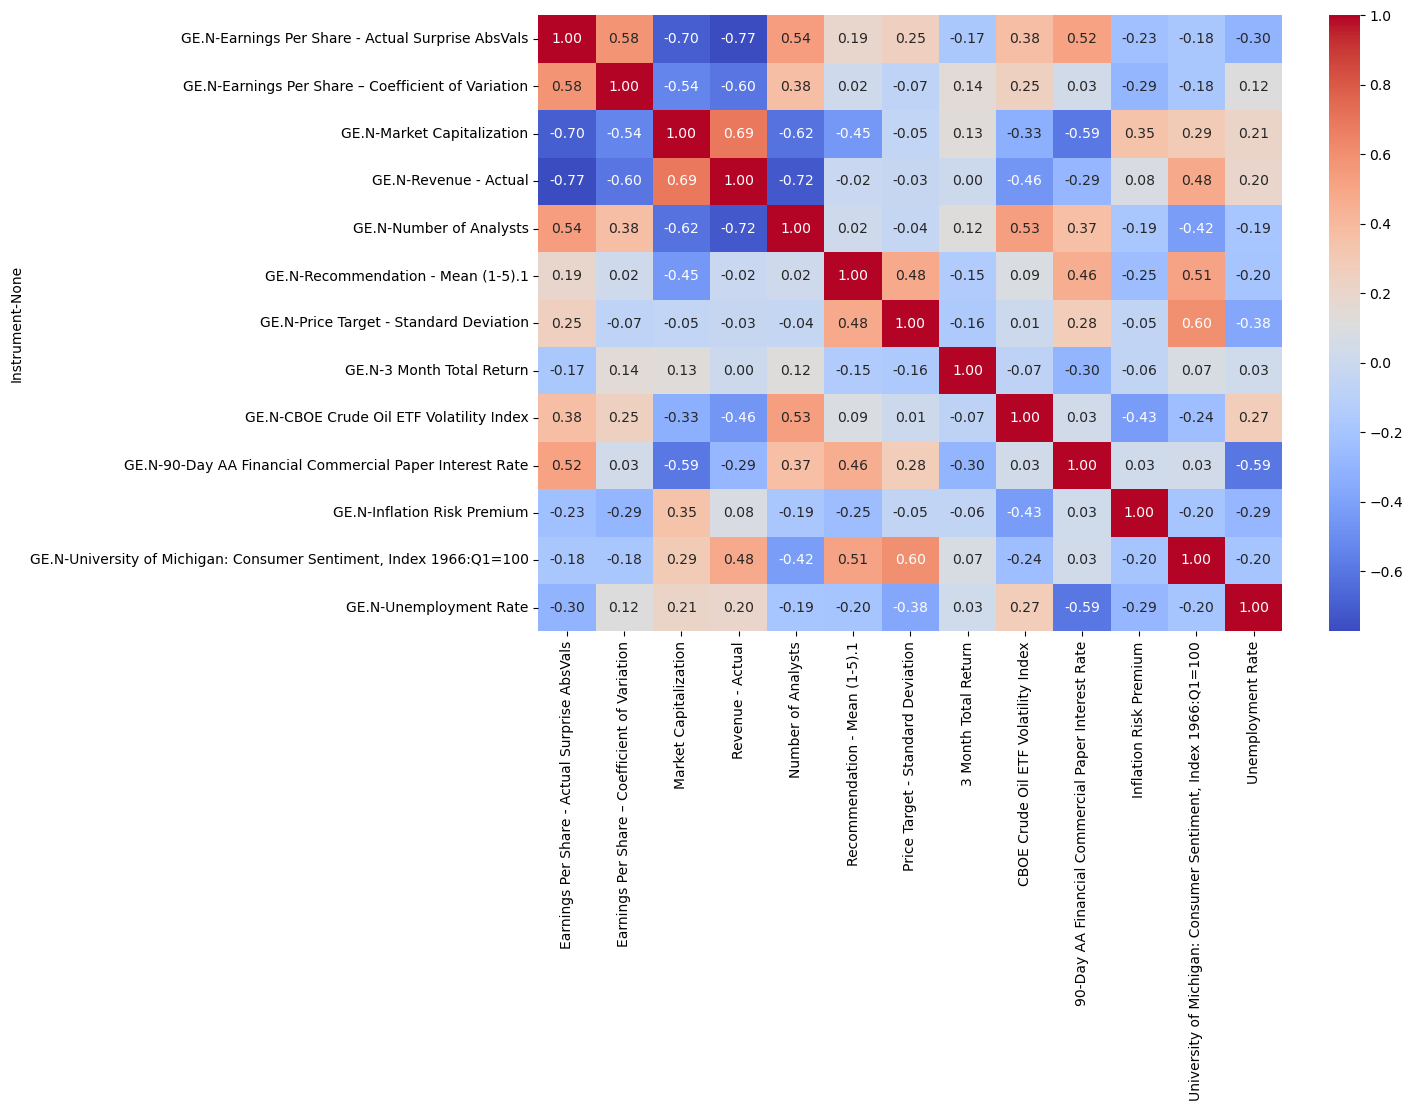

In [16]:
# plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix2, cmap='coolwarm', annot=True, fmt='.2f')